In [1]:
import sys

sys.path.append("../")

from bunkatopics import Bunka
from bunkatopics.functions.clean_text import clean_tweet
from langchain.embeddings import HuggingFaceEmbeddings
import random
from datasets import load_dataset
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
dataset = load_dataset("rguo123/trump_tweets")["train"]
full_docs = dataset["content"]
full_docs = random.sample(full_docs, 500)
full_docs = [clean_tweet(x) for x in full_docs]
full_docs = [x for x in full_docs if len(x)>50]

In [3]:
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
#embedding_model = HuggingFaceEmbeddings(model_name="BAAI/bge-base-en-v1.5")

bunka = Bunka(embedding_model=embedding_model)
bunka.fit(full_docs)

INFO      |2023-11-14 16:22:28|{}|fit|Extracting Terms
/Users/charlesdedampierre/Desktop/bunka_related_projects/BunkaTopics/.venv/lib/python3.10/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
100%|████████████████████████████████████████████████████████████████| 408/408 [00:02<00:00, 146.62it/s]
INFO      |2023-11-14 16:22:31|{}|fit|Embedding Documents, this may take few minutes
INFO      |2023-11-14 16:22:32|{}|fit|Reducing Dimensions
/Users/charlesdedampierre/Desktop/bunka_related_projects/BunkaTopics/.venv/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. 

In [4]:
# Topic Modeling
df_topics = bunka.get_topics(n_clusters=20, name_lenght=3, min_count_terms = 1, top_terms_overall = 2000)

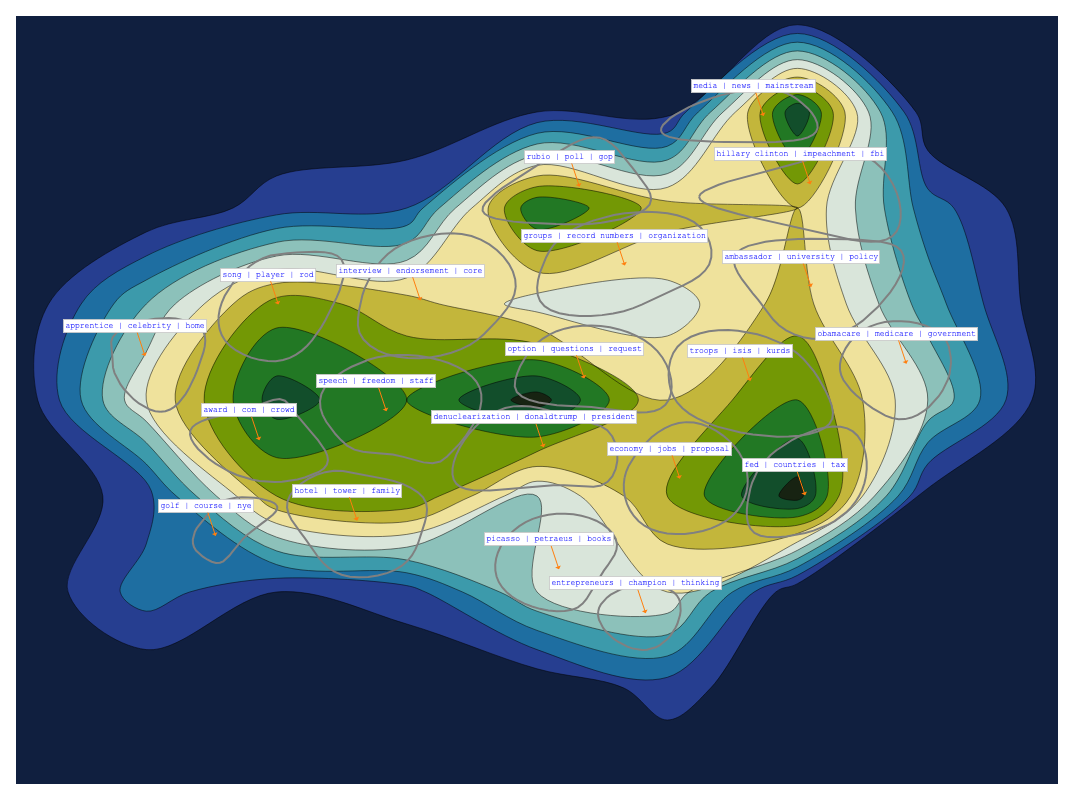

In [5]:

topic_fig = bunka.visualize_topics(width=800, height=800)
topic_fig.show()

Chose a Generative AI Model

In [6]:
from dotenv import load_dotenv

load_dotenv()

from langchain.llms import OpenAI
open_ai_generative_model = OpenAI(openai_api_key = os.getenv('OPEN_AI_KEY'))

"""
from langchain.llms import LlamaCpp
generative_model = LlamaCpp(
    model_path=os.getenv("MODEL_PATH"),
    n_ctx=2048,
    temperature=0.75,
    max_tokens=2000,
    top_p=1,
    verbose=False,
)
generative_model.client.verbose = False

"""

'\nfrom langchain.llms import LlamaCpp\ngenerative_model = LlamaCpp(\n    model_path=os.getenv("MODEL_PATH"),\n    n_ctx=2048,\n    temperature=0.75,\n    max_tokens=2000,\n    top_p=1,\n    verbose=False,\n)\ngenerative_model.client.verbose = False\n\n'

In [7]:
# Topic Modeling Clean
df_topics = bunka.get_clean_topic_name(generative_model=open_ai_generative_model)
topic_fig_clean = bunka.visualize_topics(width=800, height=800)
#topic_fig_clean.show()

Creating new labels for clusters: 100%|█████████████████████████████████| 20/20 [00:11<00:00,  1.74it/s]


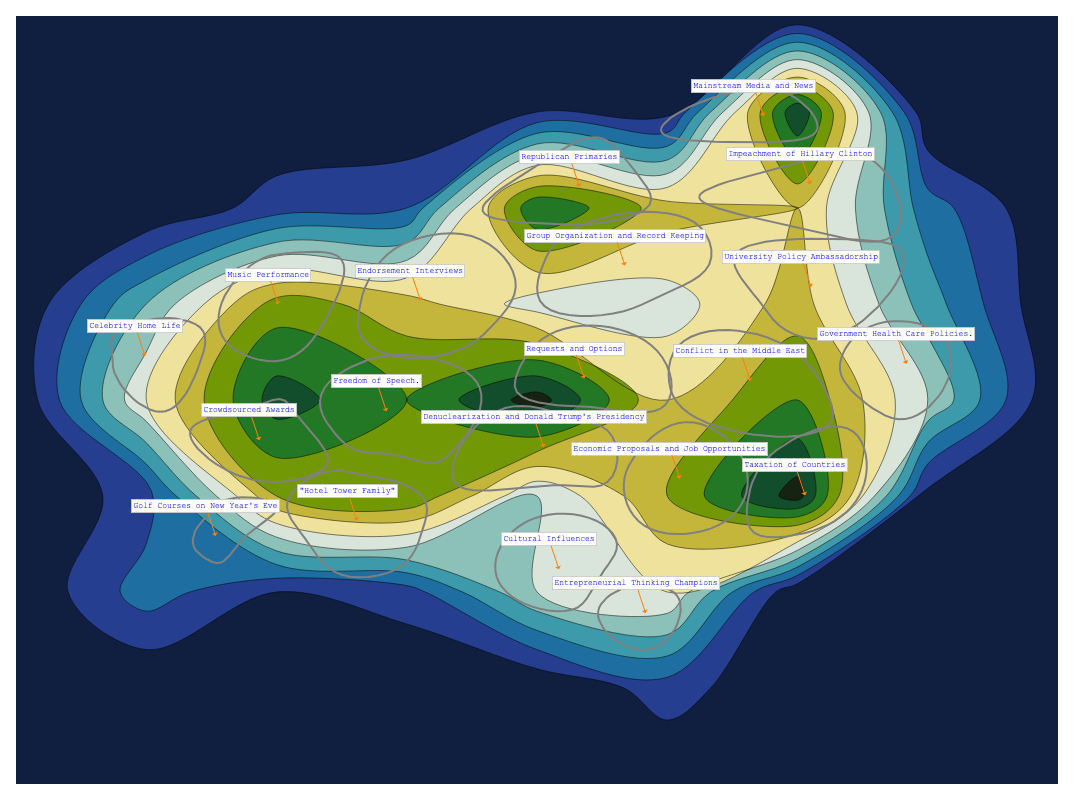

In [8]:
topic_fig_clean

## Open the front-end

In [9]:
bunka.start_server()

NPM server started.



> bunka-web@0.1.0 start
> react-scripts  --openssl-legacy-provider start



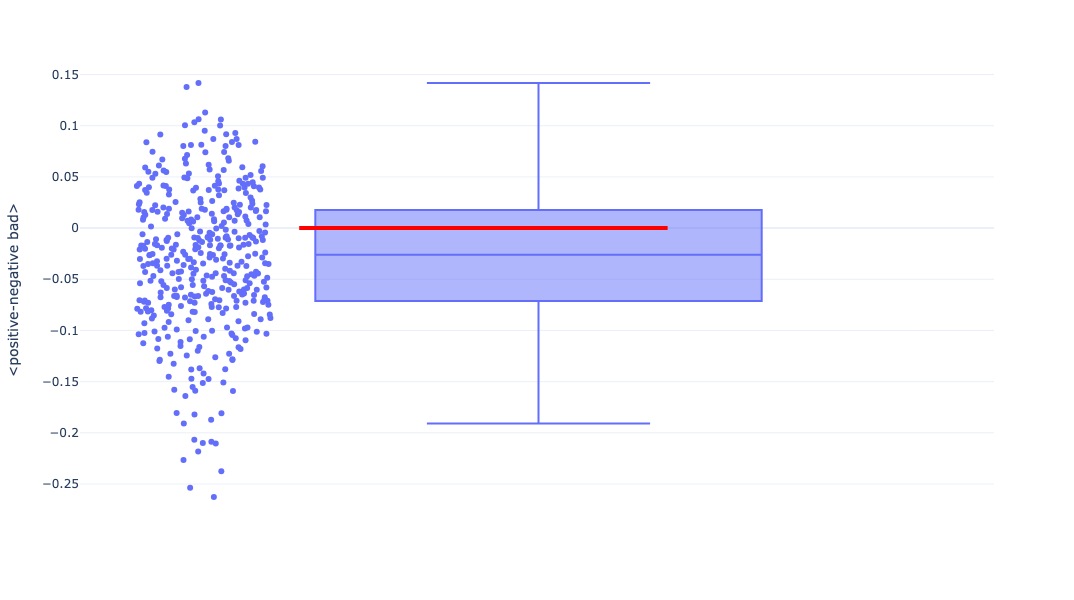

In [10]:
fig_solo = bunka.visualize_bourdieu_one_dimension(
    left=["negative", "bad"],
    right=["positive"],
    width=600,
    height=600,
    explainer=False,
)

fig_solo.show()

Creating new labels for clusters:   0%|                                           | 0/4 [00:00<?, ?it/s](node:11881) [DEP_WEBPACK_DEV_SERVER_ON_AFTER_SETUP_MIDDLEWARE] DeprecationWarning: 'onAfterSetupMiddleware' option is deprecated. Please use the 'setupMiddlewares' option.
(Use `node --trace-deprecation ...` to show where the warning was created)
(node:11881) [DEP_WEBPACK_DEV_SERVER_ON_BEFORE_SETUP_MIDDLEWARE] DeprecationWarning: 'onBeforeSetupMiddleware' option is deprecated. Please use the 'setupMiddlewares' option.
Creating new labels for clusters:  25%|████████▊                          | 1/4 [00:00<00:01,  2.31it/s]

Starting the development server...



Creating new labels for clusters:  75%|██████████████████████████▎        | 3/4 [00:01<00:00,  1.96it/s]

Compiled successfully!

You can now view bunka-web in the browser.

  http://localhost:3000

Note that the development build is not optimized.
To create a production build, use npm run build.

webpack compiled successfully


Creating new labels for clusters: 100%|███████████████████████████████████| 4/4 [00:01<00:00,  2.18it/s]


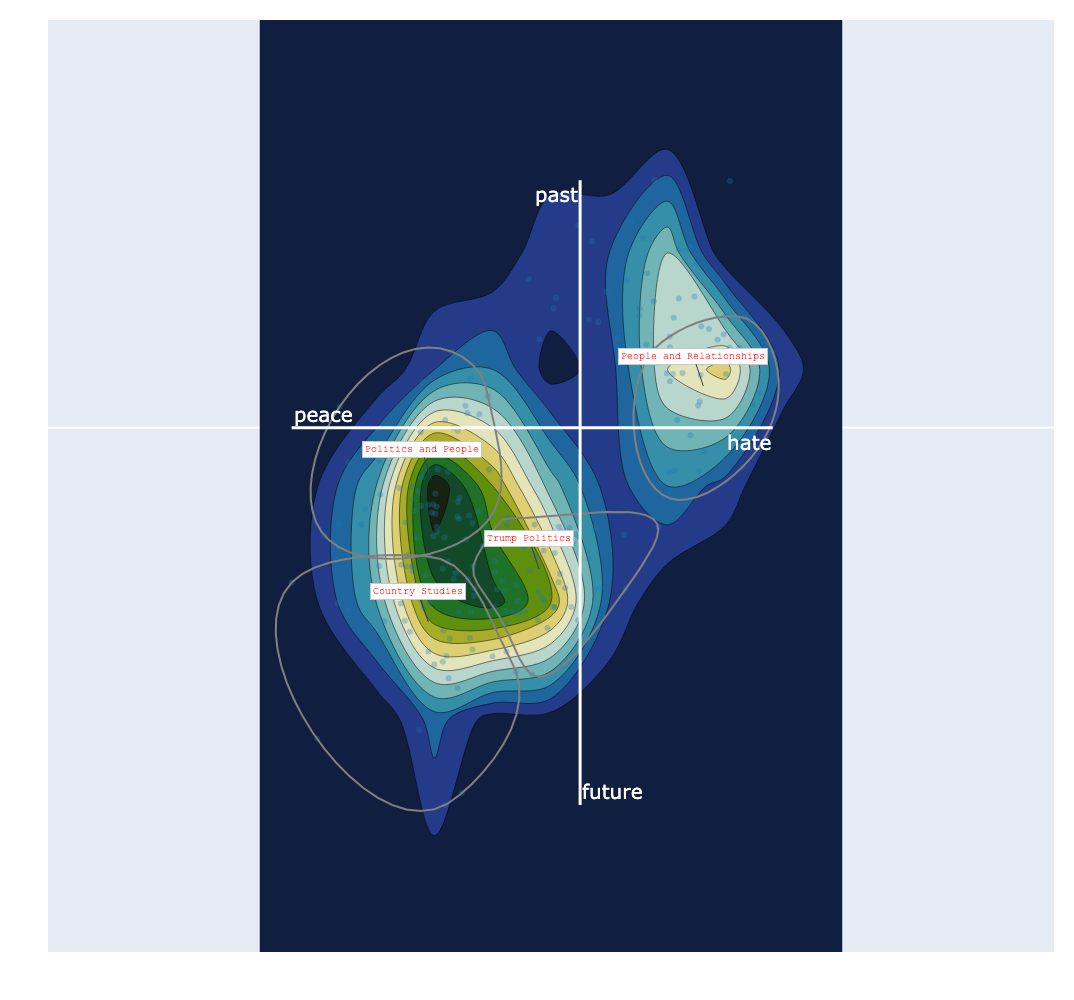

In [11]:
manual_axis_name = {
                    'x_left_name':'hate',
                    'x_right_name':'peace',
                   'y_top_name':'past',
                    'y_bottom_name':'future',
                    }

bourdieu_fig = bunka.visualize_bourdieu(
    generative_model=open_ai_generative_model,
    x_left_words=["this is about about hate"],
    x_right_words=["this is a about peace"],
    y_top_words=["this is about past"],
    y_bottom_words=["this is about future"],
    height=1000,
    width=1000,
    display_percent=False,
    clustering=True,
    topic_n_clusters=5,
    topic_terms=5,
    topic_top_terms_overall=500,
    topic_gen_name=True,
    convex_hull = True,
    radius_size = 0.5,
    manual_axis_name = manual_axis_name
)

bourdieu_fig.show()

In [12]:
bunka.start_server_bourdieu()

Server on port 3000 is already running. Killing it...
NPM server started.


In [13]:
#import plotly
#plotly.offline.plot(bourdieu_fig)

In [14]:
res = bunka.rag_query(query = 'Who is Donald Trump', generative_model = open_ai_generative_model, top_doc = 5)

INFO      |2023-11-14 16:22:52|{}|rag_query|Answering your query, please wait a few seconds



> bunka-web@0.1.0 start
> react-scripts  --openssl-legacy-provider start



(node:11943) [DEP_WEBPACK_DEV_SERVER_ON_AFTER_SETUP_MIDDLEWARE] DeprecationWarning: 'onAfterSetupMiddleware' option is deprecated. Please use the 'setupMiddlewares' option.
(Use `node --trace-deprecation ...` to show where the warning was created)
(node:11943) [DEP_WEBPACK_DEV_SERVER_ON_BEFORE_SETUP_MIDDLEWARE] DeprecationWarning: 'onBeforeSetupMiddleware' option is deprecated. Please use the 'setupMiddlewares' option.


Starting the development server...



In [15]:
print(res['result'])

 Donald Trump is the current President of the United States.


In [16]:
for doc in res['source_documents']:
    text = doc.page_content.strip()
    print(text)

statement from president donald j  trump com ektzthflk6
donald trump loves america  he loves americans  he loves our vets
i like the donald becuz he is not afraid to speak the truth no matter what it is    thank you
donald s head of security       international golf club
small business says trump is their pick for president
